In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from scipy import stats

# Generate Data
- Stats.distribution.rsv
    - Generates random numbers for a specified distribution

In [2]:
np.random.seed(10)

In [3]:
# Generates a random uniform distribution
# loc = start
# scale = count from start
# ragne = (loc,loc + scale)

uniform_data = stats.uniform.rvs(size=100_000,
                  loc = 0,
                  scale = 10)

# Probability Functions

## Probability Density Function - Continuous Distribution

- For a continuous function, the probability density function is the probability that the variate has the value x
- For continuous distributions the probability at a single point is 0
- The probability density function is often expressed as an integral between two points

## Probability Density Function - Discrete Distribution
- For a discrete distribution, the probability density function is the probability that the variate takes the value x
- In the bellow example the value of x is 2 and there is a 0.10 or 10% chance that a random variable will be equal to 2 from a uniform distribution of 0 to 10

In [4]:
# theoretical Probability

stats.uniform.pdf(x=4,
                  loc=1,
                  scale=6)

0.16666666666666666

In [5]:
for x in range(-1,12,3):
    print('Probability Density at x value {}: {}'.format(x,stats.uniform.pdf(x=x,
                                                                    loc=0,
                                                                    scale=10)) + '\n')

Probability Density at x value -1: 0.0

Probability Density at x value 2: 0.1

Probability Density at x value 5: 0.1

Probability Density at x value 8: 0.1

Probability Density at x value 11: 0.0



## Cumulative Distribution Function

- Determines the probability that an observation drawn from a ditribution falls bellow a specified value and range
- The probability that the variable takes a value less than or equal to x
- In the example bellow there is a 25% chance that an observation will fall between 1 to 2.5 and a 75% chance it will fall between 2.5 to 10

In [6]:
# Cumulative Distribution Function

stats.uniform.cdf(x=2.5,       # Cutoff value (quantile) to check
                 loc=0,        # Distribution Start
                 scale=10      # Distributuin End
                 )

0.25

## Percent Point Function - (Quantile Function)
- The inverse of the cumulative distribution function
- Returns a discrete value (quantile) that is less than or equal to the given probability

In [7]:
# Inverse of the cdf()

stats.uniform.ppf(q=0.20,        # Probabiity Cutoff
                 loc=0,          # Distribution Start
                 scale=20       #  Distributuin End
                 )

4.0

In [8]:
stats.uniform.cdf(x=4,         # Cutoff value (quantile) to check
                 loc=0,        # Distribution Start
                 scale=20      # Distributuin End
                 )

0.2

# Uniform Ditribution
- Can be discrete or continuous
- Each value within a certain range is equally likely to occur
- Values outside the range never occur

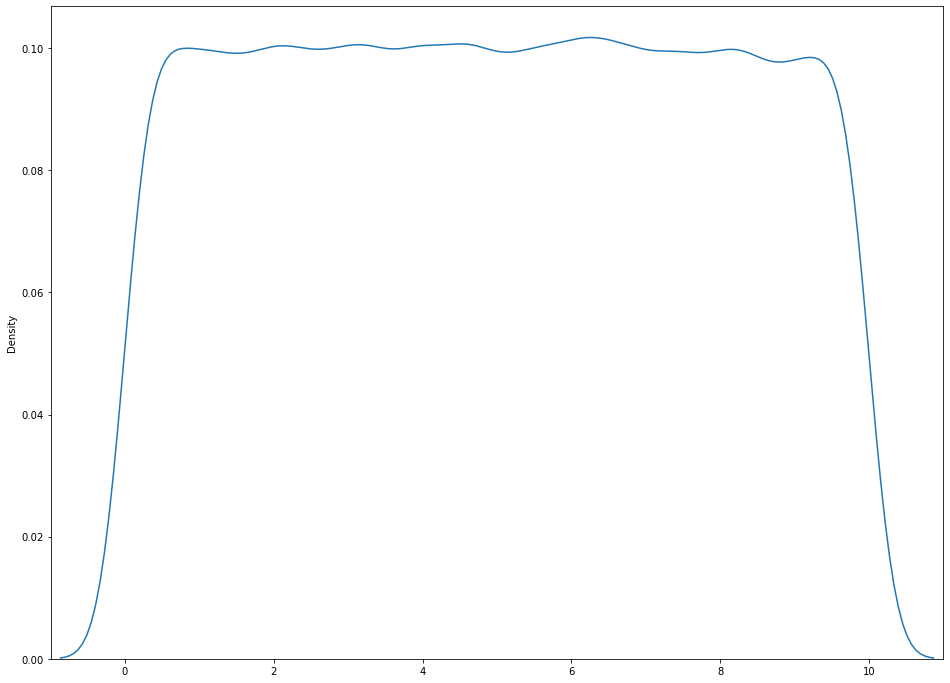

In [68]:
plt.figure(figsize=(16,12))
plt.xlim(-1,11)
sns.kdeplot(uniform_data)
plt.show()

# Uniform Distribution to Normal Distribution - Central Limit Theorem

## Central Limit Theorem
- States that the distribution of sample means approximate a normal distribution as the sample size gets larger, regardless of the population
- A minimum sample size of 30 is said to be proficient

In [10]:
i = 0
pointEstimates = []

while i < 30:
    sample = np.array(random.choices(tuple(uniform_data),k=100))
    pointEstimates.append(sample.mean())
    i += 1
    
pointEstimates2 = np.array(pointEstimates)

del pointEstimates

In [11]:
pointEstimates2

array([5.52675336, 5.25417983, 4.88598958, 5.10459261, 5.34552497,
       4.95118901, 4.65101329, 4.87399636, 4.7562724 , 4.99005952,
       4.60712905, 4.58516743, 5.06257757, 5.18216461, 5.19238445,
       4.93197774, 5.15699185, 5.21729559, 5.24488388, 5.2754955 ,
       5.11582688, 5.07154601, 5.20567986, 4.61120103, 4.7217842 ,
       4.85180728, 4.88635905, 5.04219329, 5.63186501, 4.83498142])

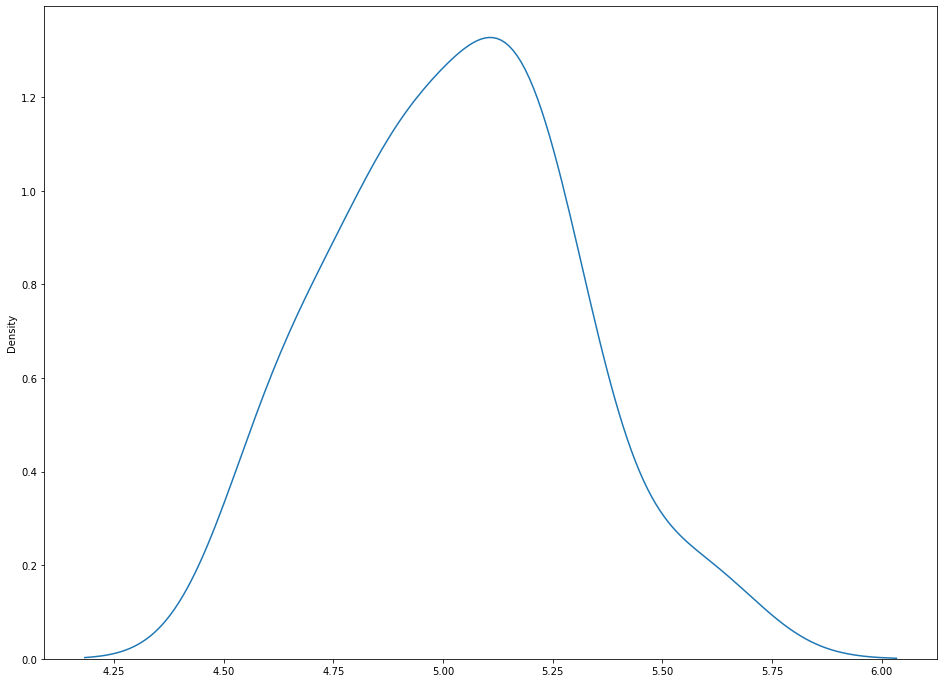

In [72]:
plt.figure(figsize=(16,12))
sns.kdeplot(pointEstimates2)
plt.show()

In [13]:
pointEstimates2.mean()

5.025629420555577

In [14]:
uniform_data.mean()

4.987423615043839

# Gaussian Distribution - (Normal Distribuion)

- A continuous probability distribution
- The most important distribution is statistics
- Many common statistical tests assume distributions are normal
- Characterized by a symmetric bell-shaped curve
- Many real world phenomena like IQ and human height follow a roughly normal distribution
- A Normal Distribution is defined by its center (mean) and spread (variance / standard deviation)
- Most data points lie around the center (mean) of a normal distribution
- The spread of normally distributed data align with the emperial rule: 68.5 - 95 - 99.7

In [15]:
normalDist_data = stats.norm.rvs(size=100_000,
                                 loc=0,
                                 scale=10)

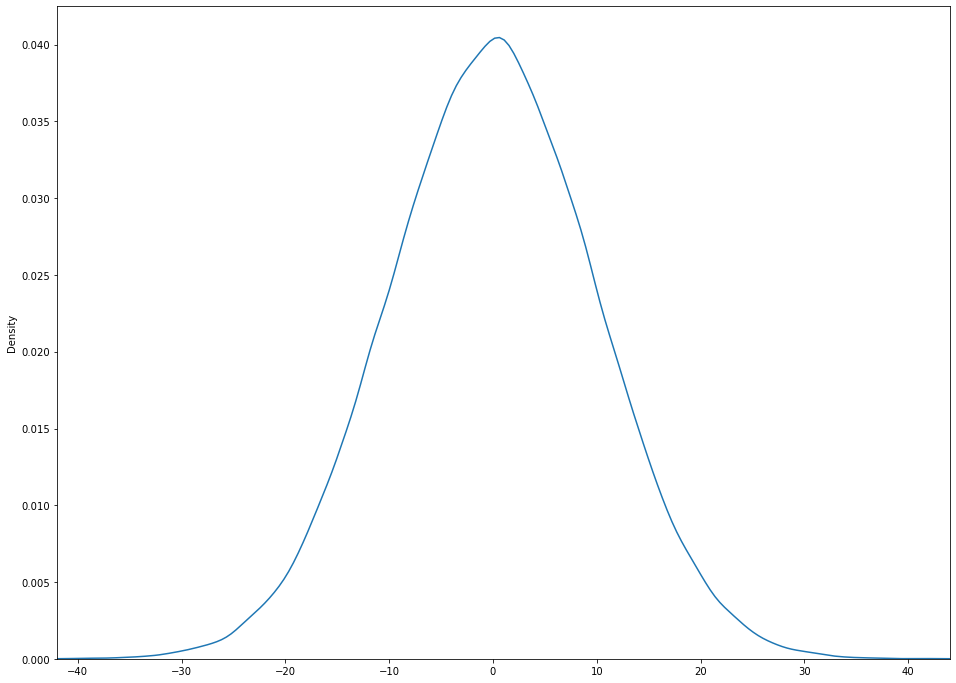

In [73]:
plt.figure(figsize=(16,12))
plt.xlim(round(normalDist_data.min()),round(normalDist_data.max()))
sns.kdeplot(normalDist_data)
plt.show()

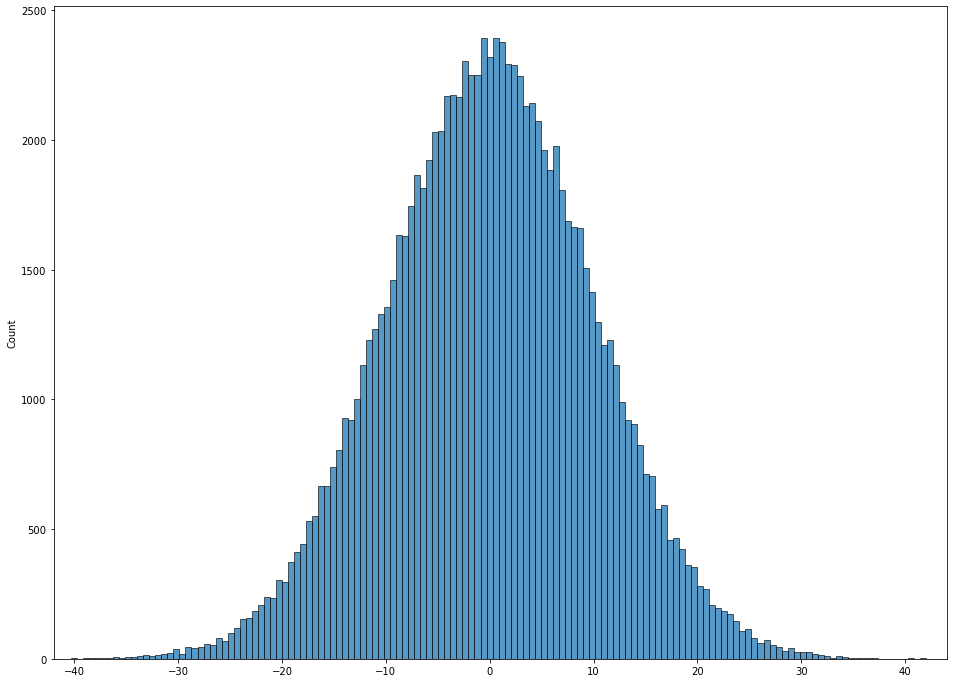

In [74]:
plt.figure(figsize=(16,12))
plt.xlim(round(normalDist_data.min()),round(normalDist_data.max()))
sns.histplot(normalDist_data)
plt.show()

In [18]:
stats.zscore(normalDist_data)

array([ 1.07659738,  1.1048752 ,  0.07941131, ..., -1.64716325,
       -0.37785339, -0.45893475])

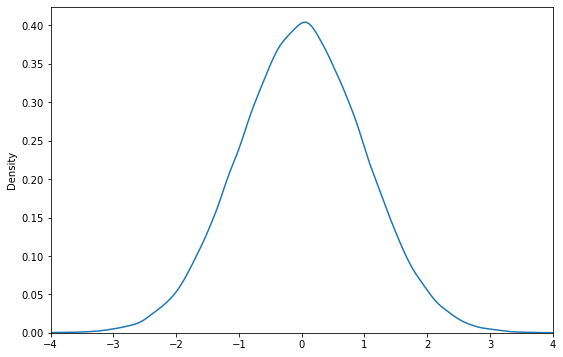

In [19]:
plt.figure(figsize=(16,12))
plt.xlim(-4,4)
sns.kdeplot(stats.zscore(normalDist_data))
plt.show()

## Next Task compute the area under the bell curve and graph it

In [20]:
def rnd(x):
    x = round(x,4) * 100
    return x

In [21]:
prob_under_minus1 = stats.norm.cdf(x=-1,
                                   loc=0,
                                   scale=1)

In [22]:
prob_under_minus2 = stats.norm.cdf(x=-2,
                                   loc=0,
                                   scale=1)

In [23]:
prob_under_minus3 = stats.norm.cdf(x=-3,
                                   loc=0,
                                   scale=1)

In [24]:
prob_over1 = 1 - stats.norm.cdf(x=1,
                               loc=0,
                               scale=1)

In [25]:
prob_between1 = 1 - (prob_over1 + prob_under_minus1)

In [26]:
prob_over2 = 1 - stats.norm.cdf(x=2,
                                loc=0,
                                scale=1)

In [27]:
prob_over3 = 1 - stats.norm.cdf(x=3,
                                loc=0,
                                scale=1)

In [28]:
norm_dist_prob = np.array([prob_under_minus3,prob_under_minus2 - prob_under_minus3, prob_under_minus1 - (prob_under_minus2 + prob_under_minus3),prob_between1,prob_over1 - (prob_over2 + prob_over3), prob_over2 - prob_over3, prob_over3])

In [29]:
norm_dist_prob = np.array([*map(rnd,norm_dist_prob)])

In [30]:
norm_dist_prob

array([ 0.13,  2.14, 13.46, 68.27, 13.46,  2.14,  0.13])

In [31]:
sum(norm_dist_prob)

99.72999999999999

# Binomial Distribution

- A discrete probability distribution that models the outcomes of a given number of random trials of some experiment or event
- How likely it is to achieve a given number of successes in n number of trials

In [32]:
fair_coin_flips = stats.binom.rvs(n=10,          # Number of flips per trial
                                  p=0.5,         # Success probability
                                  size=1000      # Number of trials
                                 ) 

In [33]:
print(pd.crosstab(index="counts", columns=fair_coin_flips))

col_0   0   1   2    3    4    5    6   7   8   9   10
row_0                                                 
counts   2   9  51  133  204  231  213  98  42  15   2


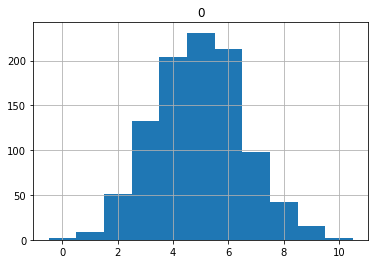

In [76]:
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11)
plt.show()

In [35]:
biased_coin_flips = stats.binom.rvs(n=10,          # Number of flips per trial
                                    p=0.8,         # Success probability
                                    size=10_000    # Number of trials
                                   )   

print(pd.crosstab(index="Count", columns = biased_coin_flips))

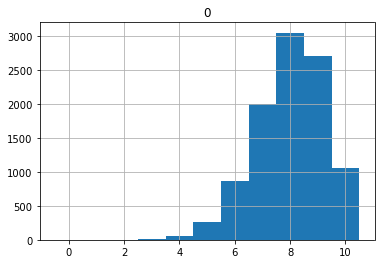

In [36]:
pd.DataFrame(biased_coin_flips).hist(range = (-0.5, 10.5), bins = 11)
plt.show()

the cdf() function returns the probability of achieving a number of successes in a certain range

In [37]:
# in the case bellow we are fliping a fair coin 10 times and
# checking the probability of getting 5 consecutive successes or less

stats.binom.cdf(
                k=5,        # probability of k = 5 successes or less
                n = 10,     # number of flips in one trial
                p = 0.5     # Success probability 0.5
               )

0.6230468749999999

In [38]:
1 - stats.binom.cdf(
                    k=5,       # probability of k = 5 consecutive successes or more
                    n=10,      # number of flips in one trial
                    p=0.5      # success probability 0.5
                   )

0.3769531250000001

## Probability Mass Function - (PMF)

- For continuous probability density functions you use pdf() to check the probability density at a given x value.
- For discrete distributions like the binomial you use stats.distribution.pmf() (Probability Mass Function) to check the mass (proportion of observations) at a given number of successes k

In [39]:
stats.binom.pmf(
                k=5,           # Probability of 5 consecutive successes exactly
                n=10,          # Number of flips in one trial
                p=0.5          # Probability of success per flip
               )


0.24609375000000025

In [40]:
for x in range(0,11):
    print('Probability of getting {x} consecutive Heads: {p}'.format(x=x,p=stats.binom.pmf(
                k=x,           # Probability of consecutive successes exactly
                n=10,          # Number of flips in one trial
                p=0.5          # Probability of success per flip
               )))

Probability of getting 0 consecutive Heads: 0.0009765625
Probability of getting 1 consecutive Heads: 0.00976562500000001
Probability of getting 2 consecutive Heads: 0.04394531249999999
Probability of getting 3 consecutive Heads: 0.11718750000000014
Probability of getting 4 consecutive Heads: 0.20507812500000022
Probability of getting 5 consecutive Heads: 0.24609375000000025
Probability of getting 6 consecutive Heads: 0.20507812500000022
Probability of getting 7 consecutive Heads: 0.11718750000000014
Probability of getting 8 consecutive Heads: 0.04394531249999999
Probability of getting 9 consecutive Heads: 0.00976562500000001
Probability of getting 10 consecutive Heads: 0.0009765625


In [41]:
v1 = []
for x in range(0,11):
    v1.append(stats.binom.pmf(
            k=x,
            n=10,
            p=0.5
            ))

In [42]:
v1 = np.array(v1)

In [43]:
v1

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

In [44]:
1 - sum(v1[:5])

0.6230468749999997

In [45]:
stats.binom.cdf(
                k=5,        # probability of k = 5 successes or less
                n = 10,     # number of flips in one trial
                p = 0.5     # Success probability 0.5
               )

0.6230468749999999

In [46]:
1 - sum(v1[5:])

0.37695312499999944

In [47]:
1 - stats.binom.cdf(
                    k=5,       # probability of k = 5 consecutive successes or more
                    n=10,      # number of flips in one trial
                    p=0.5      # success probability 0.5
                   )

0.3769531250000001

# Geometric and Exponential Distribution

### What do Geometric and Exponential Distributions model?

    - Both model the time it takes for an event to occur

### Is the Geometric distribution discrete or continuous? What does the Geometric distribution model on its own?

    - The Geometric distribution is a discrete distribution
    - Geometric distribution models the number of trials it would take to achieve a success with  repeated trials of an experiment with a constant probability
   
### Is the Exponential distribution discrete or continuous? What does the Exponential distribution model on its own?

    - The Exponential distribution is continuous
    - A continuous analog of the Geometric Distribution
    - Models the amount of time it would take for an event to occur given a constant occurance    rate 

## Geometric Distribution

In [48]:
# set the seed so the data does not change per trial
random.seed(12) # Set to some arbitrary number

In [49]:
flip_till_heads = stats.geom.rvs(size=10000,
                                 p=0.5)

In [50]:
print(pd.crosstab(index="Count", columns=flip_till_heads))

col_0    1     2     3    4    5    6   7   8   9   10  11  12  13  14
row_0                                                                 
Count  5017  2541  1205  570  338  174  70  38  22  14   5   4   1   1


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

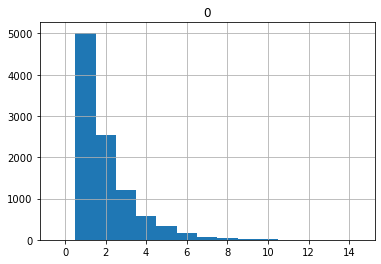

In [51]:
(
    pd.DataFrame(flip_till_heads)
    .hist(range=(-0.5, max(flip_till_heads)+0.5),
          bins=max(flip_till_heads) + 1)
)

In the above example as you can see it is about a 50% chance that it will only take 1 flip to get a heads and each addition flip decreases the likelyhood of you not getting a heads exponentially

In [52]:
# area under the curve
1 - stats.geom.cdf(k=5,  # Probability of needing 5 or more flips to get Heads
                   p=0.5)

0.03125

In [53]:
stats.geom.pmf(k=5,  # Probability of needing 5 flips to get Heads
                   p=0.5)

0.03125

In a Geometrix Distribution I dont see a diffrence in the resu8lt in the CDF and the PMF, why?

In [54]:
for x in range(1,11):
    (print('Probability of success in first {} flips to get heads: {}'
           .format(x,
                   stats.geom.cdf(k=x, p=0.5)
                  )
          )
    )

Probability of success in first 1 flips to get heads: 0.5
Probability of success in first 2 flips to get heads: 0.75
Probability of success in first 3 flips to get heads: 0.875
Probability of success in first 4 flips to get heads: 0.9375
Probability of success in first 5 flips to get heads: 0.96875
Probability of success in first 6 flips to get heads: 0.984375
Probability of success in first 7 flips to get heads: 0.9921875
Probability of success in first 8 flips to get heads: 0.99609375
Probability of success in first 9 flips to get heads: 0.998046875
Probability of success in first 10 flips to get heads: 0.9990234375


In [55]:
for x in range(1,11):
    (print('Probability of needing {} flips to get heads: {}'
           .format(x,
                   stats.geom.pmf(k=x,p=0.5)
                  )
          )
    )

Probability of needing 1 flips to get heads: 0.5
Probability of needing 2 flips to get heads: 0.25
Probability of needing 3 flips to get heads: 0.125
Probability of needing 4 flips to get heads: 0.0625
Probability of needing 5 flips to get heads: 0.03125
Probability of needing 6 flips to get heads: 0.015625
Probability of needing 7 flips to get heads: 0.0078125
Probability of needing 8 flips to get heads: 0.00390625
Probability of needing 9 flips to get heads: 0.001953125
Probability of needing 10 flips to get heads: 0.0009765625


## Exponential Distribution

- Model how long it takes for one even to occur

In [56]:
expon_prob_1 = stats.expon.cdf(x=1, # Probability of taking 1 time unit
                               scale=1)

In [57]:
1 - expon_prob_1 

0.36787944117144233

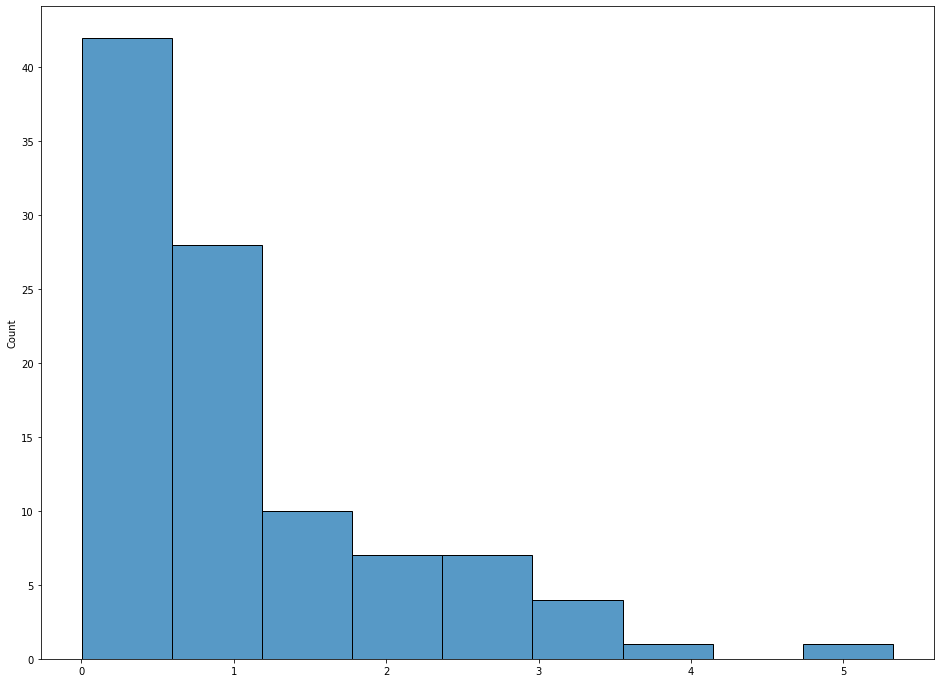

In [77]:
np.random.seed(12)
plt.figure(figsize=(16,12))
sns.histplot(stats.expon.rvs(size=100), bins=9)
plt.show()

# Poisson Distribution

- The probability of seeing a certain number of successes wthin in a given time interval
- The time it takes for the next success to occur is modeled by a exponential distribution
- Can be used to model things such as traffic or number of arrivals in a given ammount of time
- How many arrivals will occur within a certain duration of time

In [59]:
arrival_rate_1 = stats.poisson.rvs(size=10000, # Size of data
                                    mu=1       # average arrival time of 1 per hour
                 )

In [61]:
pd.crosstab(index='Counts', columns=arrival_rate_1)

col_0,0,1,2,3,4,5,6
row_0,,,,,,,
Counts,3709,3668,1812,631,146,29,5


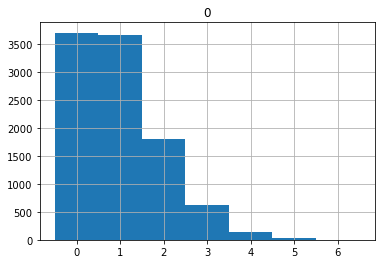

In [78]:
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5),bins=max(arrival_rate_1)+1)
plt.show()

In [63]:
arrival_rate_2 = stats.poisson.rvs(size=10000, # Size of data
                                    mu=10       # average arrival time of 10 per hour
                 )

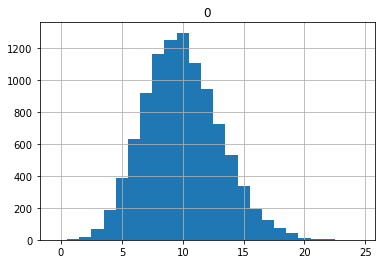

In [79]:
pd.DataFrame(arrival_rate_2).hist(range=(-0.5,max(arrival_rate_2)+0.5), bins=max(arrival_rate_2)+1)
plt.show()

## Python Scipy Library

- Contains a wide varity of functions that makes it easy to work with a wide range of probability distributions
- Including many that were not discussed in this lesson

### What are probability distribution functions useful for?

- The generation of random data
- Modeling random events
- Aiding with statistical tests and analysis

In [65]:
bernoulli = stats.bernoulli.rvs(size=10_000,
                    p=0.5)

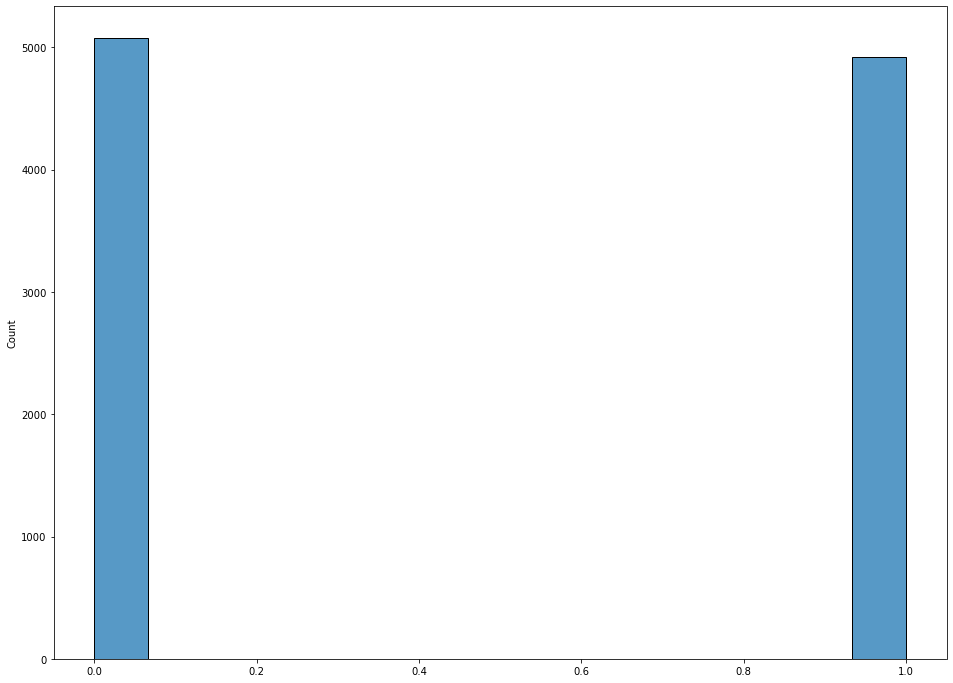

In [83]:
plt.figure(figsize=(16,12))
sns.histplot(bernoulli)
plt.show()

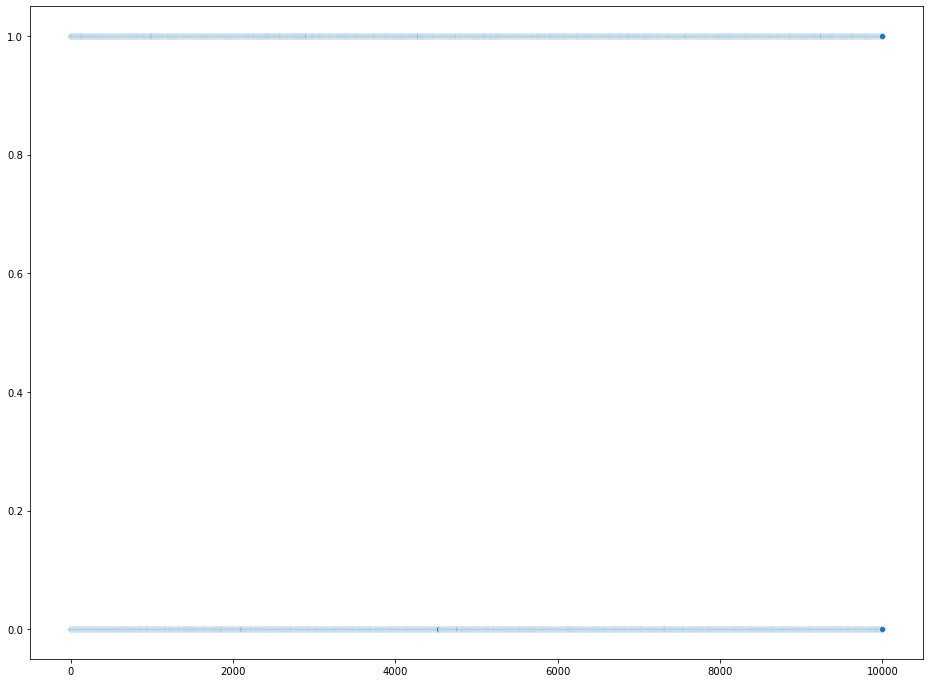

In [82]:
plt.figure(figsize=(16,12))
sns.scatterplot(data = bernoulli)
plt.show()